## SER  Assignment 4 - Anant Pandey

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re
import librosa
import librosa.display
from sklearn.preprocessing import minmax_scale
import warnings
warnings.filterwarnings('ignore')

In [2]:
dirname = '../input/hindi-speech-classification/dataset/train'        
df = pd.read_csv("../input/hindi-speech-classification/dataset/train.csv")
df['file_id'] = df['file_id'].apply(lambda x: os.path.join(dirname,x))

In [3]:
print("First 5 observations :")
print(df.head(5))

First 5 observations :
                                             file_id  gender
0  ../input/hindi-speech-classification/dataset/t...    male
1  ../input/hindi-speech-classification/dataset/t...    male
2  ../input/hindi-speech-classification/dataset/t...    male
3  ../input/hindi-speech-classification/dataset/t...  female
4  ../input/hindi-speech-classification/dataset/t...    male


**Plotting Counts according to Gender**

In [4]:
df.describe().T

,count,unique,top,freq
file_id,1998,1998,../input/hindi-speech-classification/dataset/t...,1
gender,1998,2,male,1664


**A countplot of the same**

male      1664
female     334
Name: gender, dtype: int64


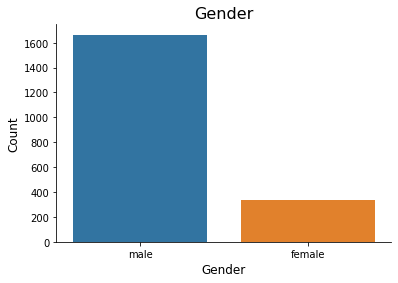

In [5]:
print(df["gender"].value_counts())
plt.title('Gender', size=16)
sns.countplot( df.gender)
plt.ylabel('Count', size=12)
plt.xlabel('Gender', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

**Male Class is more so dataset is imbalanced**

In [6]:
for dirname, _, filenames in os.walk('/kaggle/input/hindi-speech-classification/dataset/train'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/hindi-speech-classification/dataset/train/common_voice_hi_26236348.mp3
/kaggle/input/hindi-speech-classification/dataset/train/common_voice_hi_25982670.mp3
/kaggle/input/hindi-speech-classification/dataset/train/common_voice_hi_25982602.mp3
/kaggle/input/hindi-speech-classification/dataset/train/common_voice_hi_24758462.mp3
/kaggle/input/hindi-speech-classification/dataset/train/common_voice_hi_25935932.mp3
/kaggle/input/hindi-speech-classification/dataset/train/common_voice_hi_25998803.mp3
/kaggle/input/hindi-speech-classification/dataset/train/common_voice_hi_26044000.mp3
/kaggle/input/hindi-speech-classification/dataset/train/common_voice_hi_26326512.mp3
/kaggle/input/hindi-speech-classification/dataset/train/common_voice_hi_25242412.mp3
/kaggle/input/hindi-speech-classification/dataset/train/common_voice_hi_24026514.mp3
/kaggle/input/hindi-speech-classification/dataset/train/common_voice_hi_23839871.mp3
/kaggle/input/hindi-speech-classification/dataset/train/common_vo

**2. Select 2 samples for each female and male voices, plot zero crossing rate.
Comment your inferences.**

Creating a function for Zero Crossing Rate

In [7]:
def create_Zero_crossing_rate(data, sr, i):
    zero_crossings = librosa.zero_crossings(data)
    print("Sum of zero crossing ", zero_crossings.sum())
    plt.figure(figsize=(10, 3))
    plt.title('Zero Crossing Rate of audio {} '.format(i), size=15)
    zcrs = librosa.feature.zero_crossing_rate(data)
    plt.plot(zcrs[0])
    plt.show()   

Creating a Function for plotting waveplots

In [8]:
def create_waveplot(data, sr, i):
    plt.figure(figsize=(10, 3))
    plt.title('Waveplot for audio with {}'.format(i), size=15)
    librosa.display.waveshow(data, sr=sr)
    plt.show()

**Two samples for Female Voices**

In [9]:
from IPython.display import Audio

Sum of zero crossing  9051


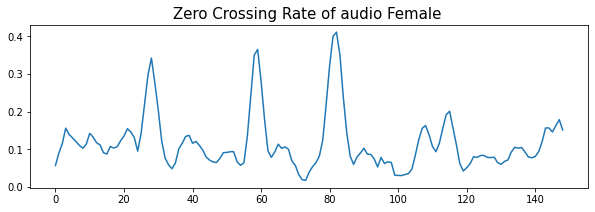

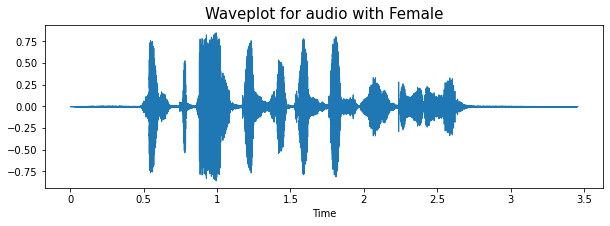

In [10]:
FEMALE_1 = df[(df['gender']=='female') ]
Female1 = FEMALE_1.sample()
x= Female1.iloc[0].file_id+".mp3"
info= "Female"
data, sampling_rate = librosa.load(x)
create_Zero_crossing_rate(data, sampling_rate, info)
create_waveplot(data, sampling_rate, info)
Audio(x)

Sum of zero crossing  16127


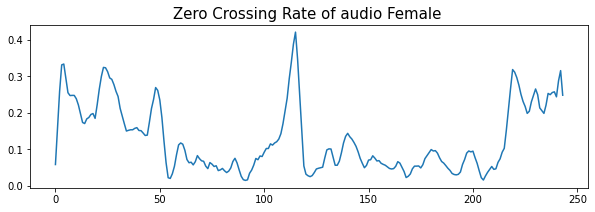

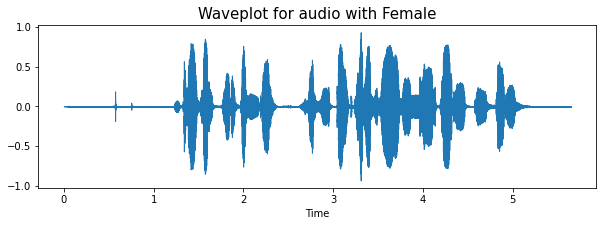

In [11]:
FEMALE_1 = df[(df['gender']=='female') ]
Female1 = FEMALE_1.sample()
x= Female1.iloc[0].file_id+".mp3"
info= "Female"
data, sampling_rate = librosa.load(x)
create_Zero_crossing_rate(data, sampling_rate, info)
create_waveplot(data, sampling_rate, info)
Audio(x)

**Two Samples for Male Voices**

Sum of zero crossing  6034


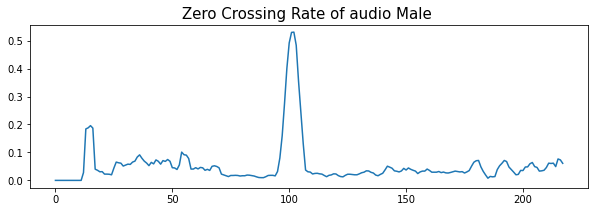

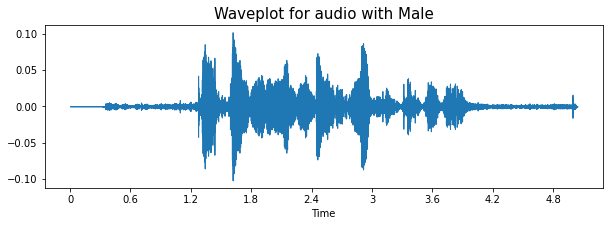

In [12]:
MALE_1 = df[(df['gender']=='male') ]
Male1 = MALE_1.sample()
x= Male1.iloc[0].file_id+".mp3"
info= "Male"
data, sampling_rate = librosa.load(x)
create_Zero_crossing_rate(data, sampling_rate, info)
create_waveplot(data, sampling_rate, info)
Audio(x)

Sum of zero crossing  6317


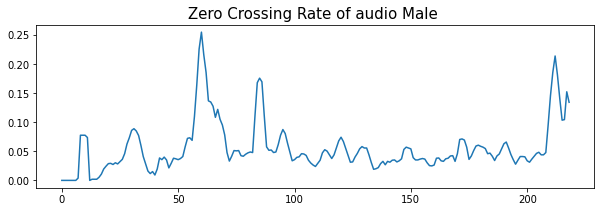

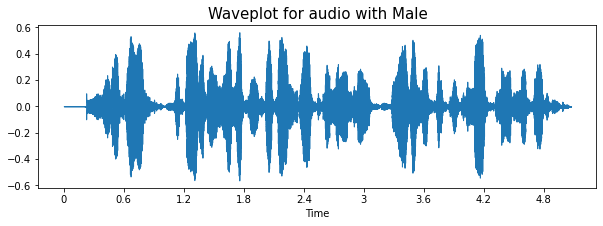

In [13]:
MALE_2 = df[(df['gender']=='male') ]
Male2 = MALE_2.sample()
x= Male2.iloc[0].file_id+".mp3"
info= "Male"
data, sampling_rate = librosa.load(x)
create_Zero_crossing_rate(data, sampling_rate, info)
create_waveplot(data, sampling_rate, info)
Audio(x)

**Inference : ZCR is the number of times the signal goes from positive to negative or vice cersa. We can consistently observe the presence of ZCR**

**3. Extracr ZCR features for all audios**

In [14]:
from sklearn.impute import KNNImputer
%matplotlib inline
import numpy as np
from sklearn.cluster import MeanShift
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
import IPython.display as ipd
import plotly as py
import plotly.graph_objs as go

In [15]:
def all_create_zero_cross_rating_features(x):
    zcrs = []
    try:
        data , sr = librosa.load(x)
        zcrs = librosa.feature.zero_crossing_rate(data)[0]
    except:
        print('Error reading audio')
    return zcrs

In [16]:
All_audios = pd.DataFrame((df['file_id']+'.mp3').apply(lambda a: all_create_zero_cross_rating_features(a)).tolist())

In [17]:
All_audios.head(10)

,0,1,2,3,4,5,6,7,8,9,...,429,430,431,432,433,434,435,436,437,438
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.008301,0.052246,0.052246,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.013672,0.071777,0.071777,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.054688,0.089355,0.127930,0.170410,0.159180,0.170898,0.182617,0.188477,0.192871,0.191406,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.148926,0.307617,0.466797,0.622559,0.627930,0.621094,0.610352,0.570312,0.527832,0.504395,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0.061035,0.138672,0.261230,0.370117,0.393555,0.404297,0.347168,0.248535,0.187988,0.127441,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,0.090332,0.121094,0.161133,0.151367,0.153320,0.159668,0.142578,0.127441,0.118164,0.117676,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,0.085938,0.097656,0.120605,0.150391,0.091309,0.105957,0.142578,0.153809,0.148926,0.238281,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,0.062012,0.110352,0.145508,0.165039,0.142090,0.130859,0.132812,0.145996,0.162109,0.168457,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,0.132324,0.241699,0.354980,0.441895,0.379883,0.341309,0.305664,0.297852,0.299316,0.287598,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Printing the Shape

In [19]:
print("Shape of All Audios :",All_audios.shape, df.shape)

Shape of All Audios : (1998, 439) (1998, 2)


In [20]:
All_audios.isnull().sum().sum()

518865

**4. Imputation of null values with two options**
1. Zero imputation
2. KNN imputation

*Zero Imputation*

In [21]:
All_audios_impute = All_audios.copy()

In [22]:
All_audios_impute = All_audios_impute.fillna(0)

In [23]:
All_audios_impute.isnull().sum().sum()

0

**Correlation Plot between ZCR after Zero imputation**

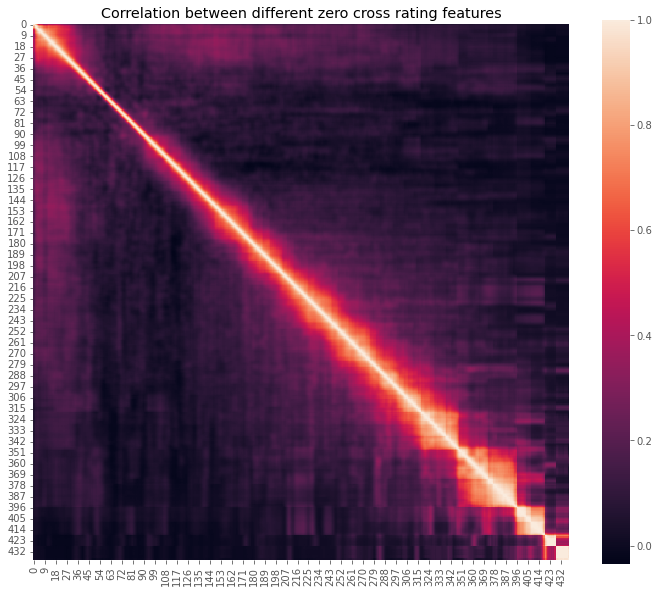

In [24]:
plt.figure(figsize=(12,10))
sns.heatmap(All_audios_impute.corr(), vmax=1, square=True)
plt.title('Correlation between different zero cross rating features')
plt.show()

*KNN Imputation*

In [25]:
from sklearn.impute import KNNImputer
imputer = KNNImputer()

Applying imputer

In [26]:
All_audios_impute_KNN = imputer.fit_transform(All_audios)
All_audios_impute_KNN= pd.DataFrame(All_audios_impute_KNN)
print("Null Counts :",All_audios_impute_KNN.isnull().sum().sum())

Null Counts : 0


**5. Apply the following : **
**a. PCA on zero impute and generate the clusters using KMeans.**

In [27]:
pca = PCA()
All_audios_impute_pca = pca.fit_transform(All_audios_impute)

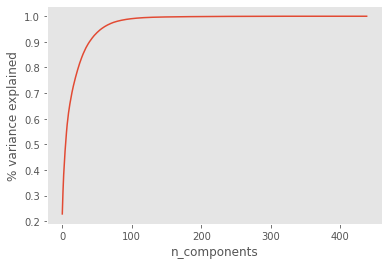

In [28]:
pca = PCA(n_components = All_audios_impute.shape[1])
pca_data = pca.fit_transform(All_audios_impute)

percent_var_explained = pca.explained_variance_/(np.sum(pca.explained_variance_))
cumm_var_explained = np.cumsum(percent_var_explained)

plt.plot(cumm_var_explained)
plt.grid()
plt.xlabel("n_components")
plt.ylabel("% variance explained")
plt.show()

In [29]:
print("Cumulative Variance :",cumm_var_explained)

Cumulative Variance : [0.22816091 0.3150828  0.38151407 0.429601   0.47371177 0.51163817
 0.5458888  0.57647926 0.60109873 0.6232738  0.64213275 0.6588451
 0.67452463 0.68903657 0.70344112 0.71685714 0.72847163 0.73997143
 0.75069512 0.76117691 0.77124759 0.78087569 0.79029582 0.79947045
 0.80843409 0.81665235 0.8245152  0.83229007 0.83934435 0.84636541
 0.85309377 0.85918851 0.86514217 0.87100694 0.87672251 0.88181317
 0.88656665 0.89112005 0.89562148 0.89978543 0.90369389 0.90753301
 0.91124214 0.91494335 0.91851376 0.92175732 0.92496406 0.9279307
 0.93078824 0.93355254 0.93624838 0.93883475 0.94136415 0.94379422
 0.94613962 0.94837441 0.95043709 0.95239027 0.95427552 0.95611895
 0.95791994 0.95961916 0.96122277 0.96280638 0.96432971 0.96574808
 0.96710896 0.96839899 0.96967517 0.97092044 0.97209147 0.97322536
 0.97429006 0.97530871 0.97628982 0.97718149 0.9780176  0.97884919
 0.97962573 0.98035738 0.98107073 0.98174295 0.98240366 0.98303625
 0.98362914 0.98422039 0.98477885 0.985308

Scree Plot for Explained Variance

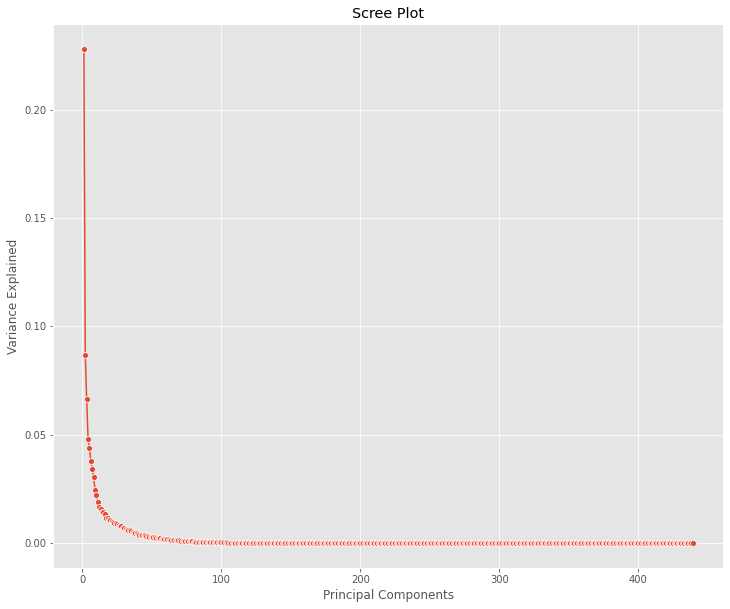

In [30]:
plt.figure(figsize=(12,10))
sns.lineplot(np.arange(pca.n_components_) + 1, pca.explained_variance_ratio_, marker='o')
plt.title('Scree Plot')
plt.xlabel('Principal Components')
plt.ylabel('Variance Explained')
plt.show()

**Variance explained is low as rows have different sentences from different genders.**

Creating dataframe object

In [31]:
All_audios_impute_pca = pd.DataFrame(All_audios_impute_pca, columns=['PCA_'+str(i) for i in range(len(All_audios_impute.columns))])

In [32]:
All_audios_impute_pca.head()

,PCA_0,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6,PCA_7,PCA_8,PCA_9,...,PCA_429,PCA_430,PCA_431,PCA_432,PCA_433,PCA_434,PCA_435,PCA_436,PCA_437,PCA_438
0,-0.758371,-0.039369,0.096803,-0.148111,-0.065619,0.094073,0.085369,0.013914,-0.003518,0.011792,...,-4.365918e-16,-1.429520e-16,-3.182550e-17,2.713904e-17,5.152624e-17,6.940234e-17,4.384484e-17,1.219524e-16,8.921559e-17,3.222784e-16
1,-0.468756,-0.199873,0.181585,0.082558,-0.148450,0.037340,0.231982,-0.114463,-0.121369,-0.003185,...,7.774638e-17,-5.414960e-17,-2.820906e-16,8.092645e-17,1.343995e-16,2.620310e-16,-2.124918e-16,-3.726785e-17,-1.707698e-16,-2.737137e-16
2,1.097367,-1.095163,-0.306566,-0.655565,-0.493391,0.845137,0.897393,-0.970064,-0.089883,-0.215540,...,2.983919e-19,-3.311631e-18,2.579616e-19,9.968636e-19,1.518474e-18,2.528464e-18,3.209088e-18,-2.576699e-19,-2.134546e-18,-4.217130e-18
3,-0.308732,0.294423,-0.212587,0.144208,0.151917,0.092427,0.115992,-0.008326,0.148873,-0.215367,...,-1.080847e-17,8.944943e-17,-3.601046e-18,1.869316e-16,2.950422e-16,6.222476e-18,1.555113e-17,-1.212335e-16,-1.725412e-16,-1.599070e-16
4,2.226811,0.382371,1.856384,-0.363235,0.220474,0.321070,-0.670470,0.307124,0.208799,-0.231058,...,4.112116e-18,2.117229e-16,5.112617e-17,1.963377e-17,4.169456e-17,-1.265039e-16,1.888679e-16,1.135410e-16,-1.102565e-16,-6.524064e-17


**Correlation between PCA Components**

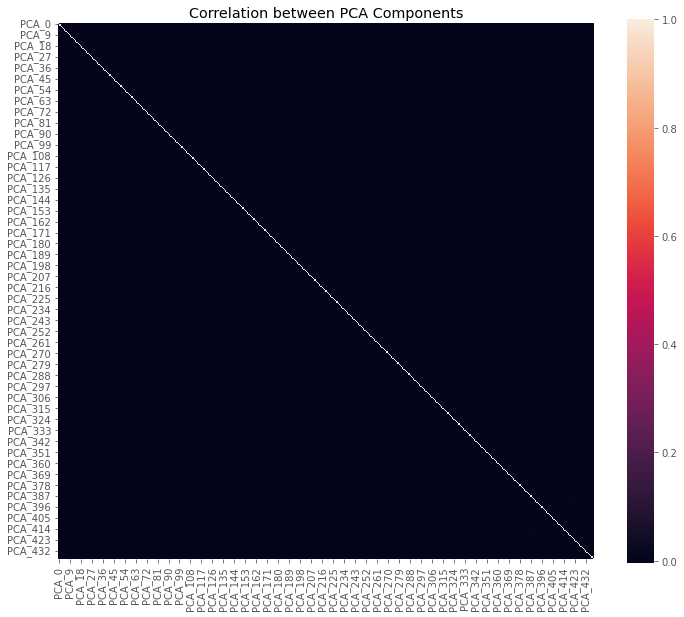

In [33]:
plt.figure(figsize=(12,10))
sns.heatmap(All_audios_impute_pca.corr(), vmax=1, square=True)

plt.title('Correlation between PCA Components')
plt.show()

**K Means Clustering**

In [34]:
optimal_value = []
for i in range(1, 11):
    kmeans_cluster = KMeans(n_clusters = i, init = 'k-means++', random_state = 32)
    kmeans_cluster.fit(All_audios_impute_pca.iloc[:, :3])
    optimal_value.append(kmeans_cluster.inertia_)

**Elbow Method**

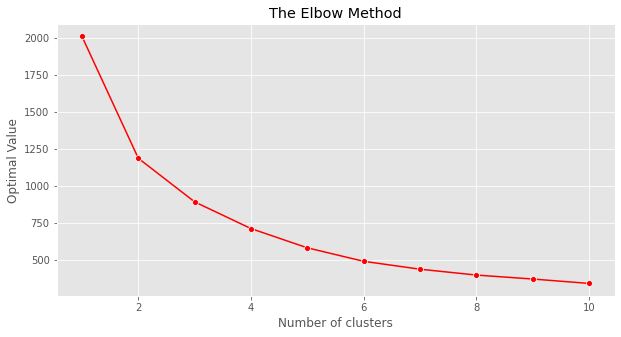

In [37]:
plt.figure(figsize=(10,5))
sns.lineplot(range(1, 11), optimal_value, marker='o',color='red')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Optimal Value')
plt.show()

In [38]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
final_kmeans = kmeans.fit_predict(All_audios_impute_pca.iloc[:, :3])

In [39]:
trace1 = go.Scatter3d(
    x= All_audios_impute_pca['PCA_0'],
    y= All_audios_impute_pca['PCA_1'],
    z= All_audios_impute_pca['PCA_2'],
    mode='markers',
     marker=dict(
        color = final_kmeans, 
        size= 10,
        line=dict(
            color= final_kmeans,
            width= 12
        ),
        opacity=0.8
     )
)
data_plotly = [trace1]
layout = go.Layout(
    title= 'Clusters wrt three PCA Components',
    scene = dict(
            xaxis = dict(title  = 'PCA 0'),
            yaxis = dict(title  = 'PCA 1'),
            zaxis = dict(title  = 'PCA 2')
        )
)
fig = go.Figure(data=data_plotly, layout=layout)
fig.show()

**b. PCA on KNN imputation with KMeans, Agglomerative, DBSCAN, and mean shift.**

In [40]:
pca = PCA()
All_audios_impute_pcaKNN = pca.fit_transform(All_audios_impute_KNN)

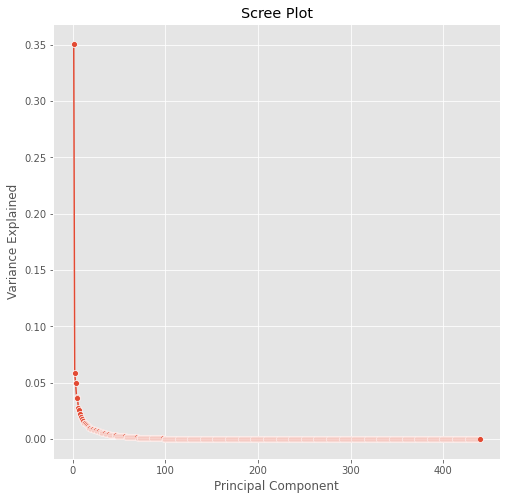

In [41]:
plt.figure(figsize=(8,8))
sns.lineplot(np.arange(pca.n_components_) + 1, pca.explained_variance_ratio_, marker='o')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

Creating a dataframe object

In [42]:
All_audios_impute_pcaKNN = pd.DataFrame(All_audios_impute_pcaKNN, columns=['PCA_'+str(i) for i in range(len(All_audios_impute_KNN.columns))])
All_audios_impute_pcaKNN.head()

,PCA_0,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6,PCA_7,PCA_8,PCA_9,...,PCA_429,PCA_430,PCA_431,PCA_432,PCA_433,PCA_434,PCA_435,PCA_436,PCA_437,PCA_438
0,-0.923332,-0.047261,0.062369,0.122029,-0.024794,0.107132,-0.045735,-0.129471,0.039800,-0.102179,...,3.260541e-17,2.943563e-17,-8.577800e-17,-2.136365e-18,-1.233011e-17,1.260171e-16,-8.672989e-17,1.168352e-17,7.961443e-17,1.964981e-16
1,-0.845137,-0.000493,-0.044179,0.172403,-0.070495,0.020929,-0.017570,-0.112072,0.143395,-0.098346,...,1.272580e-16,5.120467e-17,-1.536887e-16,4.450680e-17,7.032185e-18,-6.213012e-17,1.755136e-16,-8.306030e-17,2.496301e-17,3.185277e-16
2,0.527634,0.130736,0.260096,1.013400,0.118680,0.578905,0.449838,-0.811509,0.584382,-0.016766,...,-1.433154e-16,7.552910e-17,5.332760e-17,-7.276489e-17,-4.973883e-17,1.754002e-17,7.788407e-17,-2.621133e-17,4.928504e-17,1.351905e-17
3,-0.020844,-0.115921,0.082269,0.127796,0.217404,0.031016,0.050982,-0.052481,-0.280681,-0.113313,...,3.611701e-17,-3.763115e-17,9.092614e-17,7.577493e-17,-6.931851e-17,-7.182268e-18,9.708207e-17,2.794279e-17,-1.587480e-17,1.618997e-17
4,2.888741,-0.190247,1.053140,0.098507,-0.734264,0.366625,-0.644135,0.376219,-0.586329,-0.403806,...,4.978287e-17,6.452441e-17,-4.380552e-17,1.011510e-16,-2.059590e-17,-3.800095e-18,3.363975e-17,4.034084e-17,-2.367603e-19,-8.013540e-17


**Correlation between PCA Components**

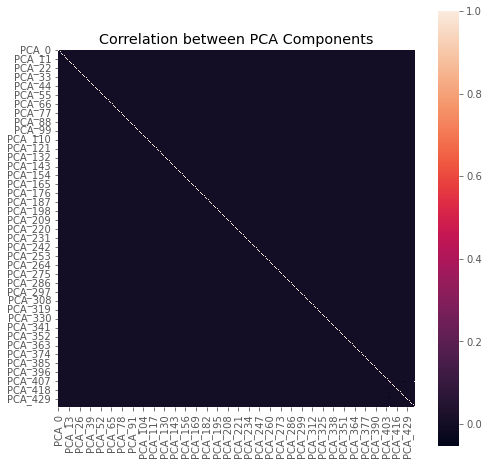

In [43]:
plt.figure(figsize=(8,8))
sns.heatmap(All_audios_impute_pcaKNN.corr(), vmax=1, square=True)

plt.title('Correlation between PCA Components')
plt.show()

**K Means**

In [44]:
optimal_value = []
for i in range(1, 11):
    kmeans_cluster = KMeans(n_clusters = i, init = 'k-means++', random_state = 32)
    kmeans_cluster.fit(All_audios_impute_pcaKNN.iloc[:, :3])
    optimal_value.append(kmeans_cluster.inertia_)

**The elbow for each component two clusters are highly seen and 3 or 4 can be used to create clusters, we selected 3 clusters**

In [45]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
final_kmeans = kmeans.fit_predict(All_audios_impute_pcaKNN.iloc[:, :3])

In [46]:
trace1 = go.Scatter3d(
    x= All_audios_impute_pcaKNN['PCA_0'],
    y= All_audios_impute_pcaKNN['PCA_1'],
    z= All_audios_impute_pcaKNN['PCA_2'],
    mode='markers',
     marker=dict(
        color = final_kmeans, 
        size= 10,
        line=dict(
            color= final_kmeans,
            width= 12
        ),
        opacity=0.8
     )
)
data_plotly = [trace1]
layout = go.Layout(
    title= 'Clusters wrt three PCA Components',
    scene = dict(
            xaxis = dict(title  = 'PCA 0'),
            yaxis = dict(title  = 'PCA 1'),
            zaxis = dict(title  = 'PCA 2')
        )
)
fig = go.Figure(data=data_plotly, layout=layout)
fig.show()

**Agglomerative Clustering**

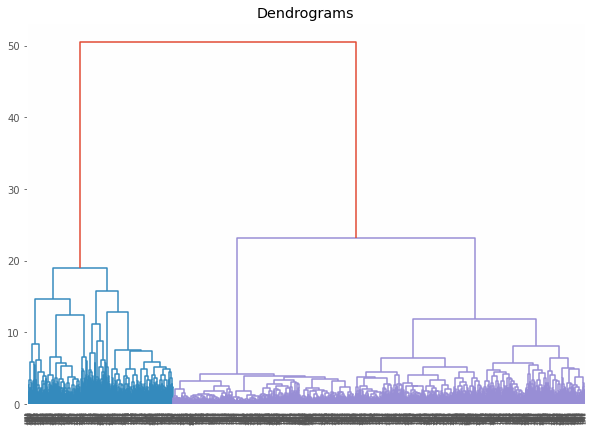

In [47]:
import scipy.cluster.hierarchy as shc
from matplotlib import pyplot
pyplot.figure(figsize=(10, 7))  
pyplot.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(All_audios_impute_pcaKNN, method='ward'))

**Dendrogram for Agglomerative Clustering**

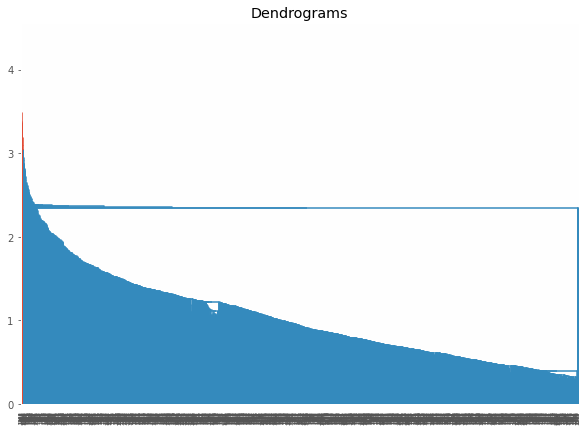

In [48]:
pyplot.figure(figsize=(10, 7))  
pyplot.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(All_audios_impute_pcaKNN, method='single'))

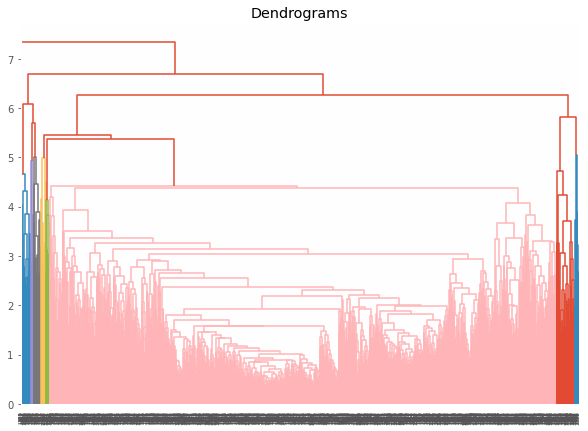

In [49]:
pyplot.figure(figsize=(10, 7))  
pyplot.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(All_audios_impute_pcaKNN, method='complete'))

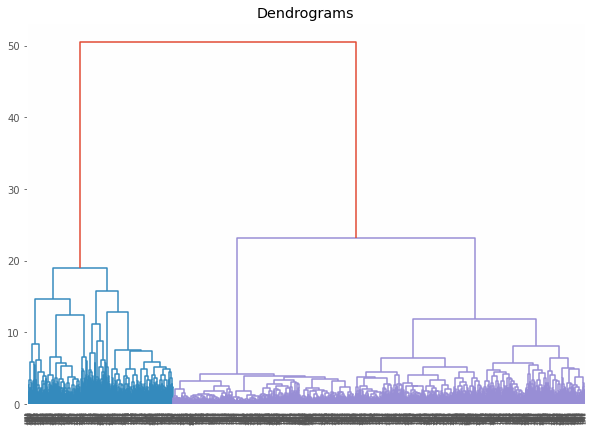

In [50]:
pyplot.figure(figsize=(10, 7))  
pyplot.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(All_audios_impute_pcaKNN, method='ward'))

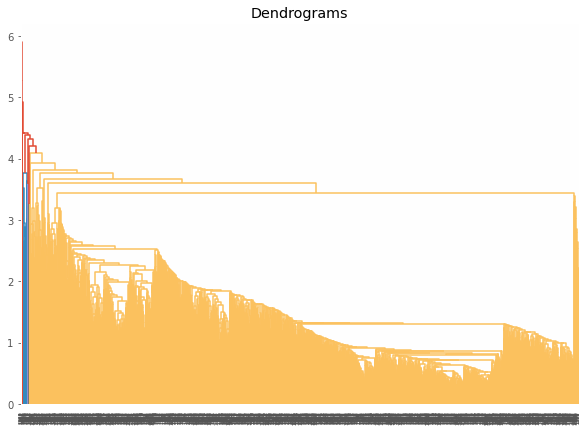

In [51]:
pyplot.figure(figsize=(10, 7))  
pyplot.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(All_audios_impute_pcaKNN, method='average'))

**Best cluster obtained by Wards method(n_clusters = 3)**

**Agglomerative clustering**

In [52]:
from numpy import unique
from numpy import where
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=3)
yhat = model.fit(All_audios_impute_pcaKNN)
ag_l= model.labels_
clusters = unique(yhat)
final_agg = yhat.fit_predict(All_audios_impute_pcaKNN.iloc[:, :3])

In [53]:
trace1 = go.Scatter3d(
    x= All_audios_impute_pcaKNN['PCA_0'],
    y= All_audios_impute_pcaKNN['PCA_1'],
    z= All_audios_impute_pcaKNN['PCA_2'],
    mode='markers',
     marker=dict(
        color = final_agg, 
        size= 10,
        line=dict(
            color= final_agg,
            width= 12
        ),
        opacity=0.8
     )
)
data_plotly = [trace1]
layout = go.Layout(
    title= 'Clusters wrt three PCA Components',
    scene = dict(
            xaxis = dict(title  = 'PCA 0'),
            yaxis = dict(title  = 'PCA 1'),
            zaxis = dict(title  = 'PCA 2')
        )
)
fig = go.Figure(data=data_plotly, layout=layout)
fig.show()

**DBSCAN**

In [54]:
!pip install kneed

1.8103981195633057


<Figure size 360x360 with 0 Axes>

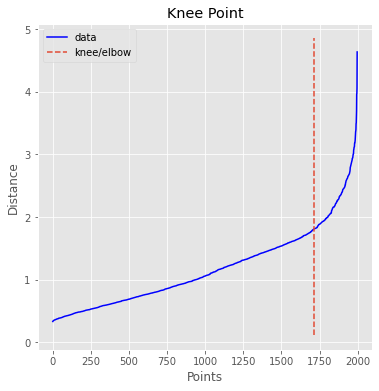

In [55]:
from sklearn.neighbors import NearestNeighbors
nearest_neighbors = NearestNeighbors(n_neighbors=11)
neighbors = nearest_neighbors.fit(All_audios_impute_pcaKNN)
distances, indices = neighbors.kneighbors(All_audios_impute_pcaKNN)
distances = np.sort(distances[:,10], axis=0)
from kneed import KneeLocator
i = np.arange(len(distances))
knee = KneeLocator(i, distances, S=1, curve='convex', direction='increasing', interp_method='polynomial')
fig = plt.figure(figsize=(5, 5))
knee.plot_knee()
plt.xlabel("Points")
plt.ylabel("Distance")
print(distances[knee.knee])

**We infer that eps value is 1.81**

In [56]:
2*len(All_audios_impute_pcaKNN)
from sklearn.cluster import DBSCAN
model = DBSCAN(eps=1.8103981195633057)
final_db = model.fit_predict(All_audios_impute_pcaKNN)
clusters = unique(final_db)

In [57]:
clusters

array([-1,  0])

In [58]:
trace1 = go.Scatter3d(
    x= All_audios_impute_pcaKNN['PCA_0'],
    y= All_audios_impute_pcaKNN['PCA_1'],
    z= All_audios_impute_pcaKNN['PCA_2'],
    mode='markers',
     marker=dict(
        color = final_db, 
        size= 10,
        line=dict(
            color= final_db,
            width= 12
        ),
        opacity=0.8
     )
)
data_plotly = [trace1]
layout = go.Layout(
    title= 'Clusters wrt three PCA Components',
    scene = dict(
            xaxis = dict(title  = 'PCA 0'),
            yaxis = dict(title  = 'PCA 1'),
            zaxis = dict(title  = 'PCA 2')
        )
)
fig = go.Figure(data=data_plotly, layout=layout)
fig.show()

**Mean Shift**

In [59]:
from sklearn.cluster import  estimate_bandwidth
bandwidth = estimate_bandwidth(All_audios_impute_pcaKNN)
ms = MeanShift(bandwidth=bandwidth)
ms.fit(All_audios_impute_pcaKNN)
labels = ms.labels_
final_ms = ms.fit_predict(All_audios_impute_pcaKNN)
clusters = unique(final_ms)
clusters 

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [60]:
trace1 = go.Scatter3d(
    x= All_audios_impute_pcaKNN['PCA_0'],
    y= All_audios_impute_pcaKNN['PCA_1'],
    z= All_audios_impute_pcaKNN['PCA_2'],
    mode='markers',
     marker=dict(
        color = final_ms, 
        size= 10,
        line=dict(
            color= final_ms,
            width= 12
        ),
        opacity=0.8
     )
)
data_plotly = [trace1]
layout = go.Layout(
    title= 'Clusters wrt three PCA Components',
    scene = dict(
            xaxis = dict(title  = 'PCA 0'),
            yaxis = dict(title  = 'PCA 1'),
            zaxis = dict(title  = 'PCA 2')
        )
)
fig = go.Figure(data=data_plotly, layout=layout)
fig.show()

**c. T-SNE (t-distributed Stochastic Neighbor Embedding) on zero impute with KMeans.**

In [61]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=3, verbose=1, random_state=123)
model = tsne.fit_transform(All_audios_impute) 

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1998 samples in 0.001s...
[t-SNE] Computed neighbors for 1998 samples in 0.178s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1998
[t-SNE] Computed conditional probabilities for sample 1998 / 1998
[t-SNE] Mean sigma: 0.263777
[t-SNE] KL divergence after 250 iterations with early exaggeration: 74.826927
[t-SNE] KL divergence after 1000 iterations: 1.311996


In [62]:
print("Model shape :",model.shape)

Model shape : (1998, 3)


In [63]:
model_tsne = pd.DataFrame({'C_0':model.T[0],'C_1':model.T[1],'C_2':model.T[2]})

In [64]:
model_tsne.head()

,C_0,C_1,C_2
0,-4.941272,0.507036,-10.767069
1,-2.633969,-7.386036,-6.049191
2,1.481035,-23.496872,1.516305
3,-4.153650,13.961179,5.630487
4,21.933336,8.638537,1.342459


**KMeans Clusetring with one TSNE Component**

In [65]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 132)
final_ts1 = kmeans.fit_predict(model_tsne.iloc[:,:1])

**KMeans Clusetring with three TSNE Component**

In [66]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 132)
final_ts3 = kmeans.fit_predict(model_tsne.iloc[:,:3])

In [67]:
trace1 = go.Scatter3d(
    x= model_tsne['C_0'],
    y= model_tsne['C_1'],
    z= model_tsne['C_2'],
    mode='markers',
     marker=dict(
        color = final_ts3, 
        size= 10,
        line=dict(
            color= final_ts3,
            width= 12
        ),
        opacity=0.8
     )
)
data_plotly = [trace1]
layout = go.Layout(
    title= 'Clusters wrt three TSNE Components',
    scene = dict(
            xaxis = dict(title  = 'C 1'),
            yaxis = dict(title  = 'C 2'),
            zaxis = dict(title  = 'C 3')
        )
)
fig = go.Figure(data=data_plotly, layout=layout)
fig.show()


**6. Apply silhouette score metric on the labels. Comment on the metric results.**

In [72]:
from sklearn.metrics import silhouette_score

In [73]:
score_kmeans_s = silhouette_score(All_audios_impute_pcaKNN.iloc[:, :3], final_kmeans)
print('Silhouette Score: %.4f' % score_kmeans_s)

Silhouette Score: 0.4225


In [74]:
score_AGclustering_s = silhouette_score(All_audios_impute_pcaKNN.iloc[:, :3], ag_l, metric='euclidean')
print('Silhouette Score: %.4f' % score_AGclustering_s)

Silhouette Score: 0.3299


In [75]:
score_dbsacn_s = silhouette_score(All_audios_impute_pcaKNN.iloc[:, :3], final_db, metric='euclidean')
print('Silhouette Score: %.4f' % score_dbsacn_s)

Silhouette Score: 0.4645


In [76]:
score_m_s = silhouette_score(All_audios_impute_pcaKNN.iloc[:, :3], final_ms, metric='euclidean')
print('Silhouette Score: %.4f' % score_m_s)

Silhouette Score: -0.4734


In [77]:
score_t_s = silhouette_score(All_audios_impute_pca.iloc[:, :3], final_ts1, metric='euclidean')
print('Silhouette Score: %.4f' % score_t_s)

Silhouette Score: 0.2465


In [79]:
score_t_s = silhouette_score(All_audios_impute_pca.iloc[:, :3], final_ts3, metric='euclidean')
print('Silhouette Score: %.4f' % score_t_s)

Silhouette Score: 0.2470


**Comments :**
1. Silhouette Score is score metric used in evaluation of clustering algorithms. Makes use of compactness of individual clusters and inturn makes use of both inter and intra cluster distances to measure an overall score of the performance of chosesn algorithm.

2. Silhouette Coefficient ranges from [-1,1]. The higher the Silhouette Coefficients (the closer to +1), the more is the separation between clusters. A negative value indicates that those samples might have been assigned to the wrong cluster.

3. Hence from the scores we can see that DBSCAN works best.

NOTE - All trace plots have been taken from documentation available online.

**7. Publish notebook in Kaggle**
**Published**